# SVM MODELS COMPARISON USING GRID SEARCH

<b>Introduction:</b>
In this exercise, we are focusing on the GridSearchCV model for parameter tuning (kernel comparison) of our Support Vector Machine Algorithm. The dataset that we are using is none other than the Iris Flowers. The dataset is of binary class having target values of "Iris Versicolor" and "Iris-Virginica".

<b>Importing Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

-------------

<b>Loading And Visualizing Dataset</b>

In [2]:
iris = pd.read_csv("iris_two.csv", index_col=False)
iris.columns = ["SepalLength","SepalWidth","PetalLength","PetalWidth","Flower"]
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
SepalLength    100 non-null float64
SepalWidth     100 non-null float64
PetalLength    100 non-null float64
PetalWidth     100 non-null float64
Flower         100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [4]:
iris["Flower"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: Flower, dtype: int64

<Figure size 720x504 with 0 Axes>

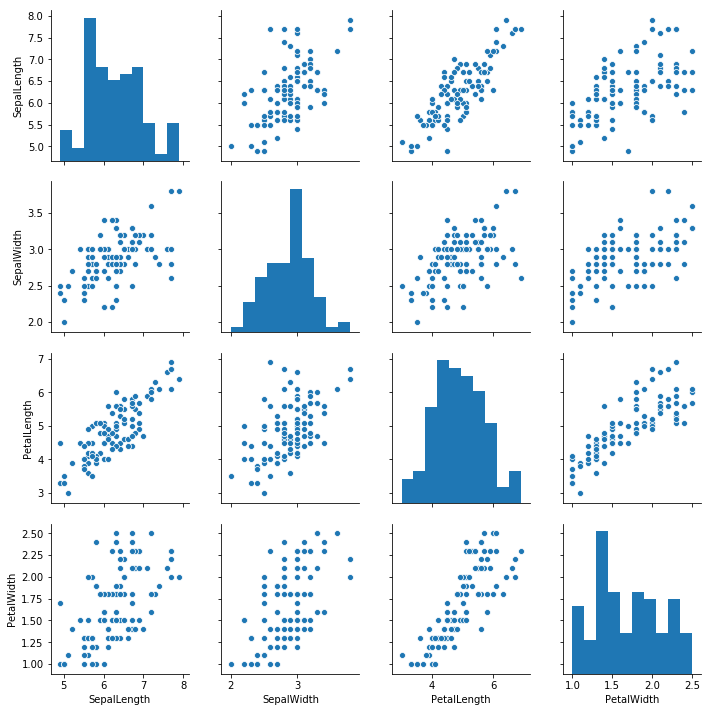

In [5]:
plt.figure(figsize=(10,7))
sns.pairplot(iris)
plt.show()

-------------

<b>Making X and y Sets</b>

In [6]:
X = iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

In [7]:
y = iris["Flower"]

----------------

<b>Creating Grid Search Model</b> 

In [20]:
clf = GridSearchCV(SVC(gamma='auto'), {'C': [1,10,20],'kernel': ['rbf','linear']}, cv=10, return_train_score=False)

---------------

<b>Fitting X and y in Grid Search Model</b>

In [21]:
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

------------

<b>Analysing The Results</b>

In [22]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001603,0.003206,0.000801,0.002403,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,0.9,1.0,1.0,1.0,0.9,0.9,1.0,1.0,1.0,0.97,0.045826,1
1,0.000800,0.002400,0.000000,0.000000,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,0.9,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,0.96,0.066332,3
2,0.000802,0.002406,0.000000,0.000000,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,0.9,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,0.96,0.066332,3
3,0.000798,0.002394,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,0.97,0.064031,1
4,0.001602,0.003204,0.000000,0.000000,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,0.9,1.0,1.0,0.8,0.9,0.9,1.0,1.0,1.0,0.95,0.067082,5
5,0.000800,0.002400,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.8,0.9,0.8,1.0,1.0,1.0,0.95,0.080623,5


In [23]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis('kernel'))
results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
1_rbf,"{'C': 1, 'kernel': 'rbf'}",1,0.97,0.045826
10_linear,"{'C': 10, 'kernel': 'linear'}",1,0.97,0.064031
1_linear,"{'C': 1, 'kernel': 'linear'}",3,0.96,0.066332
10_rbf,"{'C': 10, 'kernel': 'rbf'}",3,0.96,0.066332
20_rbf,"{'C': 20, 'kernel': 'rbf'}",5,0.95,0.067082
20_linear,"{'C': 20, 'kernel': 'linear'}",5,0.95,0.080623


<Figure size 864x504 with 0 Axes>

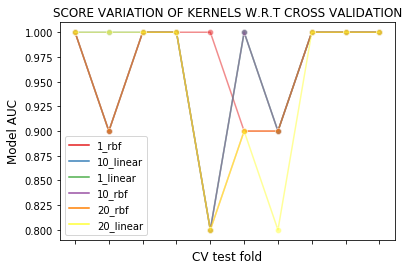

In [33]:
model_scores = results_df.filter(regex=r'split\d*_test_score')

plt.figure(figsize=(12,7))
fig, ax = plt.subplots()
sns.lineplot(data=model_scores.transpose().iloc[:30],dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
plt.title("SCORE VARIATION OF KERNELS W.R.T CROSS VALIDATION")
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

In [25]:
# Best Parameters
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [26]:
# Best Accuracy Score
clf.best_score_

0.97

<b>Conclusion:</b>
The parameter tuning (kernel comparison) has been carried our successfully revealing the best accuracy of 97% followed by the kernel "rbf" having C = 1. 